<h3 style='color:blue' align='center'>Handling imbalanced data in customer churn prediction</h3>

Customer churn prediction is to measure why customers are leaving a business. In this tutorial we will be looking at customer churn in telecom business. We will build a deep learning model to predict the churn and use precision,recall, f1-score to measure performance of our model.
We will then handle imbalance in data using various techniques and improve f1-score

In [4]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

In [5]:
import warnings
warnings.filterwarnings('ignore')

**Load the data**

In [6]:
df = pd.read_csv("customer_churn.csv")
df.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
4096,0829-XXPLX,Female,0,No,No,20,Yes,No,Fiber optic,Yes,...,Yes,No,Yes,No,Month-to-month,Yes,Bank transfer (automatic),89.40,1871.15,No
1235,1543-LLLFT,Male,1,Yes,No,61,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,No,One year,Yes,Mailed check,98.30,6066.55,No
1525,3012-VFFMN,Female,0,Yes,Yes,7,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.65,158.95,No
5138,4119-ZYPZY,Male,1,No,No,71,Yes,Yes,Fiber optic,No,...,No,Yes,Yes,Yes,Two year,Yes,Electronic check,106.80,7623.2,No
3061,8118-LSUEL,Male,1,No,No,23,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,106.40,2483.5,Yes


In [7]:
df.Churn.value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [8]:
517400/df.shape[0]

73.46301292063042

**First of all, drop customerID column as it is of no use**

In [9]:
df.drop('customerID',axis='columns',inplace=True)

In [10]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

**Quick glance at above makes me realize that TotalCharges should be float but it is an object. Let's check what's going on with  this column**

In [11]:
df.TotalCharges.values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

**Ahh... it is string. Lets convert it to numbers**

In [12]:
pd.to_numeric(df.TotalCharges,errors='coerce').isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Name: TotalCharges, Length: 7043, dtype: bool

In [13]:
df[pd.to_numeric(df.TotalCharges,errors='coerce').isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [14]:
df.shape

(7043, 20)

In [15]:
df.iloc[488].TotalCharges

' '

In [16]:
df[df.TotalCharges!=' '].shape

(7032, 20)

**Remove rows with space in TotalCharges**

In [17]:
df1 = df[df.TotalCharges!=' ']
df1.shape

(7032, 20)

In [18]:
df1.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [19]:
df1.TotalCharges = pd.to_numeric(df1.TotalCharges)

In [20]:
df1.TotalCharges.values

array([  29.85, 1889.5 ,  108.15, ...,  346.45,  306.6 , 6844.5 ])

In [21]:
df1[df1.Churn=='No']

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
6,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
7,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7037,Female,0,No,No,72,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.40,No
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No


**Data Visualization**

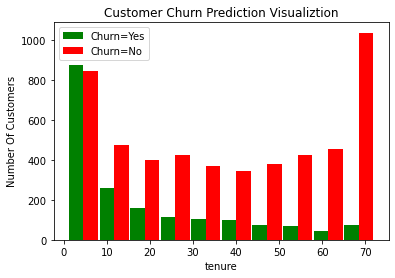

In [22]:
tenure_churn_no = df1[df1.Churn=='No'].tenure
tenure_churn_yes = df1[df1.Churn=='Yes'].tenure

plt.xlabel("tenure")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")

blood_sugar_men = [113, 85, 90, 150, 149, 88, 93, 115, 135, 80, 77, 82, 129]
blood_sugar_women = [67, 98, 89, 120, 133, 150, 84, 69, 89, 79, 120, 112, 100]

plt.hist([tenure_churn_yes, tenure_churn_no], rwidth=0.95, color=['green','red'],label=['Churn=Yes','Churn=No'])
plt.legend()

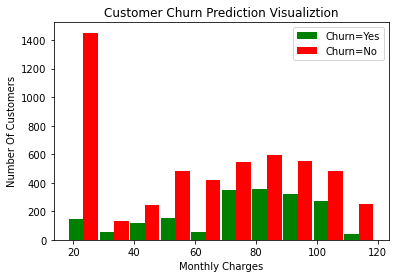

In [23]:
mc_churn_no = df1[df1.Churn=='No'].MonthlyCharges      
mc_churn_yes = df1[df1.Churn=='Yes'].MonthlyCharges      

plt.xlabel("Monthly Charges")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")

blood_sugar_men = [113, 85, 90, 150, 149, 88, 93, 115, 135, 80, 77, 82, 129]
blood_sugar_women = [67, 98, 89, 120, 133, 150, 84, 69, 89, 79, 120, 112, 100]

plt.hist([mc_churn_yes, mc_churn_no], rwidth=0.95, color=['green','red'],label=['Churn=Yes','Churn=No'])
plt.legend()

**Many of the columns are yes, no etc. Let's print unique values in object columns to see data values**

In [24]:
def print_unique_col_values(df):
       for column in df:
            if df[column].dtypes=='object':
                print(f'{column}: {df[column].unique()}') 

In [25]:
print_unique_col_values(df1)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


**Some of the columns have no internet service or no phone service, that can be replaced with a simple No**

In [26]:
df1.replace('No internet service','No',inplace=True)
df1.replace('No phone service','No',inplace=True)

In [27]:
print_unique_col_values(df1)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes']
OnlineBackup: ['Yes' 'No']
DeviceProtection: ['No' 'Yes']
TechSupport: ['No' 'Yes']
StreamingTV: ['No' 'Yes']
StreamingMovies: ['No' 'Yes']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


**Convert Yes and No to 1 or 0**

In [28]:
yes_no_columns = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup',
                  'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']
for col in yes_no_columns:
    df1[col].replace({'Yes': 1,'No': 0},inplace=True)

In [29]:
for col in df1:
    print(f'{col}: {df1[col].unique()}') 

gender: ['Female' 'Male']
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService: [0 1]
MultipleLines: [0 1]
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [0 1]
StreamingTV: [0 1]
StreamingMovies: [0 1]
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: [1 0]
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges: [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn: [0 1]


In [30]:
df1['gender'].replace({'Female':1,'Male':0},inplace=True)

In [31]:
df1.gender.unique()

array([1, 0])

**One hot encoding for categorical columns**

In [32]:
df2 = pd.get_dummies(data=df1, columns=['InternetService','Contract','PaymentMethod'])
df2.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [33]:
df2.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
1825,1,0,0,0,32,1,1,0,1,0,...,1,0,0,1,0,0,0,0,1,0
1559,1,0,0,0,2,1,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
6072,1,0,1,1,13,1,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
1955,1,0,1,1,49,1,1,0,0,0,...,0,1,0,1,0,0,1,0,0,0
6313,0,0,0,0,2,1,0,0,0,1,...,0,1,0,1,0,0,0,0,1,0


In [34]:
df2.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                          uint8
InternetService_Fiber optic                  uint8
InternetService_No             

In [35]:
cols_to_scale = ['tenure','MonthlyCharges','TotalCharges']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df2[cols_to_scale] = scaler.fit_transform(df2[cols_to_scale])

In [36]:
for col in df2:
    print(f'{col}: {df2[col].unique()}')

gender: [1 0]
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [0.         0.46478873 0.01408451 0.61971831 0.09859155 0.29577465
 0.12676056 0.38028169 0.85915493 0.16901408 0.21126761 0.8028169
 0.67605634 0.33802817 0.95774648 0.71830986 0.98591549 0.28169014
 0.15492958 0.4084507  0.64788732 1.         0.22535211 0.36619718
 0.05633803 0.63380282 0.14084507 0.97183099 0.87323944 0.5915493
 0.1971831  0.83098592 0.23943662 0.91549296 0.11267606 0.02816901
 0.42253521 0.69014085 0.88732394 0.77464789 0.08450704 0.57746479
 0.47887324 0.66197183 0.3943662  0.90140845 0.52112676 0.94366197
 0.43661972 0.76056338 0.50704225 0.49295775 0.56338028 0.07042254
 0.04225352 0.45070423 0.92957746 0.30985915 0.78873239 0.84507042
 0.18309859 0.26760563 0.73239437 0.54929577 0.81690141 0.32394366
 0.6056338  0.25352113 0.74647887 0.70422535 0.35211268 0.53521127]
PhoneService: [0 1]
MultipleLines: [0 1]
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [

**Train test split**

In [37]:
X = df2.drop('Churn',axis='columns')
y = testLabels = df2.Churn.astype(np.float32)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

In [38]:
y_train.value_counts()

0.0    4130
1.0    1495
Name: Churn, dtype: int64

In [39]:
y.value_counts()

0.0    5163
1.0    1869
Name: Churn, dtype: int64

In [40]:
5163/1869

2.7624398073836276

In [41]:
y_test.value_counts()

0.0    1033
1.0     374
Name: Churn, dtype: int64

In [42]:
X_train.shape

(5625, 26)

In [43]:
X_test.shape

(1407, 26)

In [44]:
X_train[:10]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
684,1,0,0,0,0.000000,1,0,0,0,0,...,0,1,0,1,0,0,0,0,0,1
2446,1,0,0,0,0.239437,1,1,0,1,0,...,0,1,0,1,0,0,0,1,0,0
1680,0,0,1,1,0.774648,1,1,0,0,0,...,0,0,1,0,1,0,0,0,0,1
2220,0,0,1,0,1.000000,1,0,1,1,0,...,1,0,0,0,0,1,1,0,0,0
2842,1,0,0,0,0.042254,0,0,1,0,1,...,1,0,0,1,0,0,0,0,0,1
5131,1,0,1,0,0.605634,1,1,0,0,0,...,0,1,0,1,0,0,0,0,1,0
4372,0,0,1,1,0.000000,1,0,0,0,0,...,0,0,1,1,0,0,1,0,0,0
4687,0,0,1,0,0.295775,1,0,0,0,1,...,0,1,0,1,0,0,0,1,0,0
2385,1,0,0,1,0.028169,0,0,0,1,0,...,1,0,0,1,0,0,0,0,0,1
6773,0,1,1,0,0.507042,1,1,0,0,0,...,0,1,0,1,0,0,0,0,1,0


In [45]:
len(X_train.columns)

26

**Build a model (ANN) in tensorflow/keras**

In [53]:
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import confusion_matrix , classification_report

In [53]:
# !pip install tensorflow-addons

In [54]:
from tensorflow_addons import losses

In [51]:
def ANN(X_train, y_train, X_test, y_test, loss, weights):
    model = keras.Sequential([
        keras.layers.Dense(26, input_dim=26, activation='relu'),
        keras.layers.Dense(15, activation='relu'),
        keras.layers.Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer='adam', loss=loss, metrics=['accuracy'])
    
    if weights == -1:
        model.fit(X_train, y_train, epochs=100)
    else:
        model.fit(X_train, y_train, epochs=100, class_weight = weights)
    
    print(model.evaluate(X_test, y_test))
    
    y_preds = model.predict(X_test)
    y_preds = np.round(y_preds)
    
    print("Classification Report: \n", classification_report(y_test, y_preds))
    
    return y_preds

In [55]:
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
176/176 [==============================] - 0s 647us/step - loss: 0.5776 - accuracy: 0.6848
Epoch 2/100
176/176 [==============================] - 0s 639us/step - loss: 0.4272 - accuracy: 0.8013
Epoch 3/100
176/176 [==============================] - 0s 667us/step - loss: 0.4138 - accuracy: 0.7963
Epoch 4/100
176/176 [==============================] - 0s 638us/step - loss: 0.4152 - accuracy: 0.8044
Epoch 5/100
176/176 [==============================] - 0s 638us/step - loss: 0.4168 - accuracy: 0.8005
Epoch 6/100
176/176 [==============================] - 0s 636us/step - loss: 0.4120 - accuracy: 0.8041
Epoch 7/100
176/176 [==============================] - 0s 669us/step - loss: 0.4058 - accuracy: 0.8113
Epoch 8/100
176/176 [==============================] - 0s 607us/step - loss: 0.4201 - accuracy: 0.7964
Epoch 9/100
176/176 [==============================] - 0s 589us/step - loss: 0.4160 - accuracy: 0.8017
Epoch 10/100
176/176 [==============================] - 0s 630us/step - l

## Mitigating Skewdness of Data

### Method 1: Undersampling

reference: https://www.kaggle.com/rafjaa/resampling-strategies-for-imbalanced-datasets

In [56]:
# Class count
count_class_0, count_class_1 = df1.Churn.value_counts()

# Divide by class
df_class_0 = df2[df2['Churn'] == 0]
df_class_1 = df2[df2['Churn'] == 1]

In [58]:
count_class_0, count_class_1  # it's imbalanced.

(5163, 1869)

In [59]:
# Undersample 0-class and concat the DataFrames of both class

df_class_0_under = df_class_0.sample(count_class_1)

df_test_under = pd.concat([df_class_0_under, df_class_1], axis=0)

print('Random under-sampling:')
print(df_test_under.Churn.value_counts())

Random under-sampling:
1    1869
0    1869
Name: Churn, dtype: int64


In [61]:
X = df_test_under.drop('Churn',axis='columns')
y = df_test_under['Churn']


In [62]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)
 

stratify=y means whatever class of data we have in y (here its Fraud, Not Fraud) that should be equally split in Xtrain
and Xtest i.e both Xtrain and Xtest both should have Fraud and NonFraud data. This is to avoid the scenario where in 
Xtrain has all Not Fraud data and Xtest has Fraud data. To avoid this type of split we need to specify stratify=y.
Its better to specify this instruction when we invoke any model, especially when we have less data.

In [64]:
# Number of classes in training Data
y_train.value_counts()

1    1495
0    1495
Name: Churn, dtype: int64

**Printing Classification in the last, Scroll down till the last epoch to watch the classification report**

In [65]:
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
94/94 [==============================] - 0s 733us/step - loss: 0.6660 - accuracy: 0.5808
Epoch 2/100
94/94 [==============================] - 0s 690us/step - loss: 0.5300 - accuracy: 0.7408
Epoch 3/100
94/94 [==============================] - 0s 673us/step - loss: 0.4956 - accuracy: 0.7677
Epoch 4/100
94/94 [==============================] - 0s 668us/step - loss: 0.4961 - accuracy: 0.7581
Epoch 5/100
94/94 [==============================] - 0s 678us/step - loss: 0.4789 - accuracy: 0.7802
Epoch 6/100
94/94 [==============================] - 0s 665us/step - loss: 0.4809 - accuracy: 0.7710
Epoch 7/100
94/94 [==============================] - 0s 689us/step - loss: 0.4947 - accuracy: 0.7607
Epoch 8/100
94/94 [==============================] - 0s 650us/step - loss: 0.4679 - accuracy: 0.7796
Epoch 9/100
94/94 [==============================] - 0s 648us/step - loss: 0.4740 - accuracy: 0.7760
Epoch 10/100
94/94 [==============================] - 0s 674us/step - loss: 0.4685 - accura

Check classification report above. f1-score for minority class 1 improved from **0.57 to 0.76**. Score for class 0 reduced to 0.75 from 0.85 but that's ok. We have more generalized classifier which classifies both classes with similar prediction score

### Method2: Oversampling

In [56]:
# Oversample 1-class and concat the DataFrames of both classes
df_class_1_over = df_class_1.sample(count_class_0, replace=True)
df_test_over = pd.concat([df_class_0, df_class_1_over], axis=0)

print('Random over-sampling:')
print(df_test_over.Churn.value_counts())

Random over-sampling:
1    5163
0    5163
Name: Churn, dtype: int64


In [57]:
X = df_test_over.drop('Churn',axis='columns')
y = df_test_over['Churn']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

In [58]:
# Number of classes in training Data
y_train.value_counts()

1    4130
0    4130
Name: Churn, dtype: int64

In [59]:
loss = keras.losses.BinaryCrossentropy()
weights = -1
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
259/259 [==============================] - 0s 1ms/step - loss: 0.5655 - accuracy: 0.7068
Epoch 2/100
259/259 [==============================] - 0s 1ms/step - loss: 0.4985 - accuracy: 0.7529
Epoch 3/100
259/259 [==============================] - 0s 1ms/step - loss: 0.4913 - accuracy: 0.7607
Epoch 4/100
259/259 [==============================] - 0s 1ms/step - loss: 0.4854 - accuracy: 0.7650
Epoch 5/100
259/259 [==============================] - 0s 1ms/step - loss: 0.4814 - accuracy: 0.7655
Epoch 6/100
259/259 [==============================] - 0s 1ms/step - loss: 0.4787 - accuracy: 0.7688
Epoch 7/100
259/259 [==============================] - 0s 1ms/step - loss: 0.4769 - accuracy: 0.7703
Epoch 8/100
259/259 [==============================] - 0s 1ms/step - loss: 0.4742 - accuracy: 0.7714
Epoch 9/100
259/259 [==============================] - 0s 1ms/step - loss: 0.4717 - accuracy: 0.7703
Epoch 10/100
259/259 [==============================] - 0s 1ms/step - loss: 0.4693 - accura

Check classification report above. f1-score for minority class 1 improved from **0.57 to 0.76**. Score for class 0 reduced to 0.75 from 0.85 but that's ok. We have more generalized classifier which classifies both classes with similar prediction score

### Method3: SMOTE

To install imbalanced-learn library use **pip install imbalanced-learn** command

In [46]:
X = df2.drop('Churn',axis='columns')
y = df2['Churn']

In [2]:
#!pip install imblearn

     |████████████████████████████████| 167 kB 7.8 MB/s eta 0:00:01


In [47]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_sample(X, y)

y_sm.value_counts()

1    5163
0    5163
Name: Churn, dtype: int64

In [48]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state=15, stratify=y_sm)

In [49]:
# Number of classes in training Data
y_train.value_counts()

1    4130
0    4130
Name: Churn, dtype: int64

In [55]:
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
259/259 [==============================] - 1s 733us/step - loss: 0.6069 - accuracy: 0.6755
Epoch 2/100
259/259 [==============================] - 0s 651us/step - loss: 0.4829 - accuracy: 0.7641
Epoch 3/100
259/259 [==============================] - 0s 612us/step - loss: 0.4711 - accuracy: 0.7779
Epoch 4/100
259/259 [==============================] - 0s 605us/step - loss: 0.4660 - accuracy: 0.7788
Epoch 5/100
259/259 [==============================] - 0s 597us/step - loss: 0.4520 - accuracy: 0.7821
Epoch 6/100
259/259 [==============================] - 0s 592us/step - loss: 0.4480 - accuracy: 0.7897
Epoch 7/100
259/259 [==============================] - 0s 635us/step - loss: 0.4435 - accuracy: 0.7858
Epoch 8/100
259/259 [==============================] - 0s 616us/step - loss: 0.4352 - accuracy: 0.7918
Epoch 9/100
259/259 [==============================] - 0s 632us/step - loss: 0.4266 - accuracy: 0.7929
Epoch 10/100
259/259 [==============================] - 0s 701us/step - l

259/259 [==============================] - 0s 573us/step - loss: 0.3415 - accuracy: 0.8428
Epoch 80/100
259/259 [==============================] - 0s 571us/step - loss: 0.3463 - accuracy: 0.8441
Epoch 81/100
259/259 [==============================] - 0s 570us/step - loss: 0.3398 - accuracy: 0.8516
Epoch 82/100
259/259 [==============================] - 0s 565us/step - loss: 0.3470 - accuracy: 0.8478
Epoch 83/100
259/259 [==============================] - 0s 578us/step - loss: 0.3494 - accuracy: 0.8464
Epoch 84/100
259/259 [==============================] - 0s 562us/step - loss: 0.3458 - accuracy: 0.8461
Epoch 85/100
259/259 [==============================] - 0s 570us/step - loss: 0.3448 - accuracy: 0.8440
Epoch 86/100
259/259 [==============================] - 0s 577us/step - loss: 0.3408 - accuracy: 0.8519
Epoch 87/100
259/259 [==============================] - 0s 577us/step - loss: 0.3419 - accuracy: 0.8498
Epoch 88/100
259/259 [==============================] - 0s 567us/step - loss:

SMOT Oversampling increases f1 score of minority class 1 from **0.57 to 0.81 (huge improvement)** Also over all accuracy improves from 0.78 to 0.80

### Method4: Use of Ensemble with undersampling

In [57]:
df2.Churn.value_counts()

0    5163
1    1869
Name: Churn, dtype: int64

In [58]:
# Regain Original features and labels
X = df2.drop('Churn',axis='columns')
y = df2['Churn']

In [59]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

In [60]:
y_train.value_counts()

0    4130
1    1495
Name: Churn, dtype: int64

In [74]:
4130/1495   # 1:3 ratio means class 0 data is 3 times more than class 1 data. 

2.762541806020067

model1 --> class1(1495) + class0 (0 to 1495)

model2 --> class1(1495) + class0 (1496 to 2990)

model3 --> class1(1495) + class0 (2990 to 4130)

In [61]:
df3 = X_train.copy()
df3['Churn'] = y_train

In [62]:
df3.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn
684,1,0,0,0,0.000000,1,0,0,0,0,...,1,0,1,0,0,0,0,0,1,0
2446,1,0,0,0,0.239437,1,1,0,1,0,...,1,0,1,0,0,0,1,0,0,1
1680,0,0,1,1,0.774648,1,1,0,0,0,...,0,1,0,1,0,0,0,0,1,0
2220,0,0,1,0,1.000000,1,0,1,1,0,...,0,0,0,0,1,1,0,0,0,0
2842,1,0,0,0,0.042254,0,0,1,0,1,...,0,0,1,0,0,0,0,0,1,0


In [65]:
df3_class0 = df3[df3.Churn==0]
df3_class1 = df3[df3.Churn==1]

In [66]:
def get_train_batch(df_majority, df_minority, start, end):
    
    df_train = pd.concat([df_majority[start:end], df_minority], axis=0)

    X_train = df_train.drop('Churn', axis='columns')
    y_train = df_train.Churn
    
    return X_train, y_train    

In [67]:
X_train, y_train = get_train_batch(df3_class0, df3_class1, 0, 1495)

y_pred1 = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
94/94 [==============================] - 0s 718us/step - loss: 0.6305 - accuracy: 0.6422
Epoch 2/100
94/94 [==============================] - 0s 753us/step - loss: 0.5253 - accuracy: 0.7440
Epoch 3/100
94/94 [==============================] - 0s 733us/step - loss: 0.4861 - accuracy: 0.7789
Epoch 4/100
94/94 [==============================] - 0s 741us/step - loss: 0.4906 - accuracy: 0.7608
Epoch 5/100
94/94 [==============================] - 0s 719us/step - loss: 0.5080 - accuracy: 0.7564
Epoch 6/100
94/94 [==============================] - 0s 751us/step - loss: 0.4757 - accuracy: 0.7686
Epoch 7/100
94/94 [==============================] - 0s 745us/step - loss: 0.4822 - accuracy: 0.7707
Epoch 8/100
94/94 [==============================] - 0s 691us/step - loss: 0.4809 - accuracy: 0.7666
Epoch 9/100
94/94 [==============================] - 0s 641us/step - loss: 0.4764 - accuracy: 0.7669
Epoch 10/100
94/94 [==============================] - 0s 654us/step - loss: 0.4687 - accura

94/94 [==============================] - 0s 648us/step - loss: 0.4127 - accuracy: 0.8124
Epoch 82/100
94/94 [==============================] - 0s 623us/step - loss: 0.3972 - accuracy: 0.8271
Epoch 83/100
94/94 [==============================] - 0s 621us/step - loss: 0.4021 - accuracy: 0.8204
Epoch 84/100
94/94 [==============================] - 0s 625us/step - loss: 0.3973 - accuracy: 0.8094
Epoch 85/100
94/94 [==============================] - 0s 602us/step - loss: 0.4103 - accuracy: 0.8148
Epoch 86/100
94/94 [==============================] - 0s 641us/step - loss: 0.3996 - accuracy: 0.8160
Epoch 87/100
94/94 [==============================] - 0s 633us/step - loss: 0.3934 - accuracy: 0.8227
Epoch 88/100
94/94 [==============================] - 0s 612us/step - loss: 0.4007 - accuracy: 0.8130
Epoch 89/100
94/94 [==============================] - 0s 632us/step - loss: 0.3837 - accuracy: 0.8293
Epoch 90/100
94/94 [==============================] - 0s 614us/step - loss: 0.3862 - accuracy: 

In [68]:
X_train, y_train = get_train_batch(df3_class0, df3_class1, 1495, 2990)

y_pred2 = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
94/94 [==============================] - 0s 728us/step - loss: 0.6969 - accuracy: 0.5319
Epoch 2/100
94/94 [==============================] - 0s 680us/step - loss: 0.5592 - accuracy: 0.7359
Epoch 3/100
94/94 [==============================] - 0s 689us/step - loss: 0.4884 - accuracy: 0.7694
Epoch 4/100
94/94 [==============================] - 0s 752us/step - loss: 0.4894 - accuracy: 0.7676
Epoch 5/100
94/94 [==============================] - 0s 776us/step - loss: 0.4793 - accuracy: 0.7668
Epoch 6/100
94/94 [==============================] - 0s 733us/step - loss: 0.4884 - accuracy: 0.7602
Epoch 7/100
94/94 [==============================] - 0s 746us/step - loss: 0.4682 - accuracy: 0.7836
Epoch 8/100
94/94 [==============================] - 0s 757us/step - loss: 0.4925 - accuracy: 0.7583
Epoch 9/100
94/94 [==============================] - 0s 709us/step - loss: 0.4833 - accuracy: 0.7685
Epoch 10/100
94/94 [==============================] - 0s 723us/step - loss: 0.4630 - accura

94/94 [==============================] - 0s 651us/step - loss: 0.3886 - accuracy: 0.8168
Epoch 82/100
94/94 [==============================] - 0s 659us/step - loss: 0.3996 - accuracy: 0.8142
Epoch 83/100
94/94 [==============================] - 0s 643us/step - loss: 0.3947 - accuracy: 0.8128
Epoch 84/100
94/94 [==============================] - 0s 651us/step - loss: 0.3946 - accuracy: 0.8135
Epoch 85/100
94/94 [==============================] - 0s 649us/step - loss: 0.4015 - accuracy: 0.8027
Epoch 86/100
94/94 [==============================] - 0s 646us/step - loss: 0.4028 - accuracy: 0.8075
Epoch 87/100
94/94 [==============================] - 0s 627us/step - loss: 0.3784 - accuracy: 0.8234
Epoch 88/100
94/94 [==============================] - 0s 645us/step - loss: 0.3757 - accuracy: 0.8234
Epoch 89/100
94/94 [==============================] - 0s 614us/step - loss: 0.3754 - accuracy: 0.8276
Epoch 90/100
94/94 [==============================] - 0s 604us/step - loss: 0.3871 - accuracy: 

In [69]:
X_train, y_train = get_train_batch(df3_class0, df3_class1, 2990, 4130)

y_pred3 = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
83/83 [==============================] - 0s 826us/step - loss: 0.7303 - accuracy: 0.5699
Epoch 2/100
83/83 [==============================] - 0s 809us/step - loss: 0.5768 - accuracy: 0.7376
Epoch 3/100
83/83 [==============================] - 0s 711us/step - loss: 0.5060 - accuracy: 0.7587
Epoch 4/100
83/83 [==============================] - 0s 689us/step - loss: 0.4802 - accuracy: 0.7773
Epoch 5/100
83/83 [==============================] - 0s 665us/step - loss: 0.4843 - accuracy: 0.7756
Epoch 6/100
83/83 [==============================] - 0s 686us/step - loss: 0.4713 - accuracy: 0.7868
Epoch 7/100
83/83 [==============================] - 0s 641us/step - loss: 0.4773 - accuracy: 0.7692
Epoch 8/100
83/83 [==============================] - 0s 751us/step - loss: 0.4721 - accuracy: 0.7824
Epoch 9/100
83/83 [==============================] - 0s 693us/step - loss: 0.4755 - accuracy: 0.7722
Epoch 10/100
83/83 [==============================] - 0s 761us/step - loss: 0.4691 - accura

83/83 [==============================] - 0s 660us/step - loss: 0.3824 - accuracy: 0.8258
Epoch 82/100
83/83 [==============================] - 0s 679us/step - loss: 0.3812 - accuracy: 0.8350
Epoch 83/100
83/83 [==============================] - 0s 602us/step - loss: 0.3922 - accuracy: 0.8217
Epoch 84/100
83/83 [==============================] - 0s 623us/step - loss: 0.3689 - accuracy: 0.8461
Epoch 85/100
83/83 [==============================] - 0s 622us/step - loss: 0.3656 - accuracy: 0.8466
Epoch 86/100
83/83 [==============================] - 0s 635us/step - loss: 0.3970 - accuracy: 0.8204
Epoch 87/100
83/83 [==============================] - 0s 606us/step - loss: 0.3769 - accuracy: 0.8324
Epoch 88/100
83/83 [==============================] - 0s 620us/step - loss: 0.3827 - accuracy: 0.8334
Epoch 89/100
83/83 [==============================] - 0s 619us/step - loss: 0.3664 - accuracy: 0.8452
Epoch 90/100
83/83 [==============================] - 0s 617us/step - loss: 0.3726 - accuracy: 

In [70]:
len(y_pred1)

1407

In [71]:
y_pred_final = y_pred1.copy()

for i in range(len(y_pred1)):
    n_ones = y_pred1[i] + y_pred2[i] + y_pred3[i]
    if n_ones>1:
        y_pred_final[i] = 1
    else:
        y_pred_final[i] = 0

In [72]:
cl_rep = classification_report(y_test, y_pred_final)
print(cl_rep)

              precision    recall  f1-score   support

           0       0.90      0.68      0.77      1033
           1       0.47      0.79      0.59       374

    accuracy                           0.71      1407
   macro avg       0.68      0.73      0.68      1407
weighted avg       0.78      0.71      0.72      1407



f1-score for minority class 1 improved to 0.62 from 0.57. The score for majority class 0 is suffering and reduced to 0.80 from 0.85 but at least there is some balance in terms of prediction accuracy across two classes

In [73]:
# f1-score is very imp when dataset is imbalanced. Overall SMOTE performed very well.